# Acerca del conjunto de datos

Conjunto de datos de ventas de Snitch Fashion (sin depurar)

## 📌 Contexto:
Este conjunto de datos sintéticos representa las transacciones de venta de Snitch, una marca de ropa india ficticia. Simula datos reales de ventas minoristas con registros sin depurar, diseñado para que estudiantes y profesionales practiquen la depuración de datos, el análisis exploratorio de datos (EDA) y la creación de paneles con herramientas como Python, Power BI o Excel.

## 📊 Qué encontrarás:
El conjunto de datos incluye más de 2500 registros de ventas de productos de moda en varias ciudades de la India. Contiene problemas comunes de datos como:

- Valores faltantes
- Formatos de fecha incorrectos
- Duplicados
- Errores tipográficos en categorías y nombres de ciudades
- Descuentos y valores de beneficio poco realistas

**Explicación de las columnas**

__Columna-- Descripción__
- Order_ID ------ ID único para cada venta (algunos duplicados)
- Customer_Name ------ Nombre del cliente (formato inconsistente)
- Product_Category ---Categoría de ropa (p. ej., camisetas, jeans; incluye errores tipográficos)
- Product_Name -----Producto específico vendido
- Units_Sold --Cantidad vendida (algunas negativas o nulas)
- Unit_Price --Precio por unidad (algunas faltan o son cero)
- Discount_% ----Descuento aplicado (algunos >100% o faltan)
- Sales_Amount ------Ingresos totales después del descuento (algunos errores de cálculo)
- Order_Date ---------Fecha del pedido (múltiples formatos o faltante)
- City -------Ciudad de la India (incluye errores tipográficos como "Hyd", "bengaluru")
- Segment----- Segmento de mercado (B2C, B2B o faltante)
- Profit ---------Profit obtenido en la venta (algunas poco realistas/negativas)

## 💡 Cómo usar este conjunto de datos
- Limpiar y estandarizar datos desordenados
- Convertir fechas y corregir formatos
- Realice EDA para encontrar:
- Categorías más vendidas
- Impacto de los descuentos en las ventas y las ganancias
- Tendencias mensuales/trimestrales
- Rendimiento basado en segmentos
- Crear paneles en Power BI o una tabla dinámica de Excel
- Documentar los hallazgos en un informe PDF/Markdown

## 🎯 Ideal para
- aspirantes a analistas de datos y científicos de datos
- Estudiantes del panel de Excel/Power BI
- Creadores de proyectos de portafolio
- Competiciones o prácticas de Kaggle

## 📌 Licencia:

Este conjunto de datos sintéticos fue creado exclusivamente para uso educativo. No incluye datos reales de clientes ni empresas.

**Descargar la tabla de datos:** https://www.kaggle.com/datasets/nayakganesh007/snitch-clothing-sales?resource=download

# 📊 Análisis Exploratorio de Datos (EDA) - Snitch Fashion Sales
Índice

1. Configuración del Entorno
2. Carga y Exploración Inicial
3. Análisis de Calidad de Datos
4. Limpieza y Preparación
5. Análisis Univariado
6. Análisis Bivariado
7. Detección de Outliers
8. Insights y Recomendaciones



## 1. CONFIGURACIÓN DEL ENTORNO

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_style("whitegrid")
sns.set_palette("husl")

## 2. CARGA Y EXPLORACIÓN INICIAL DE DATOS

In [2]:
# Cargar el dataset
df = pd.read_csv('Snitch_Fashion_Sales_Uncleaned.csv')

print("🔍 INFORMACIÓN BÁSICA DEL DATASET")
print("=" * 40)
print(f"Forma del dataset: {df.shape}")
print(f"Número de filas: {df.shape[0]:,}")
print(f"Número de columnas: {df.shape[1]}")

print("\n📋 PRIMERAS 5 FILAS:")
print(df.head())

print("\n📊 INFORMACIÓN DETALLADA:")
print(df.info())

print("\n🎯 TIPOS DE DATOS:")
print(df.dtypes)

print("\n📈 ESTADÍSTICAS DESCRIPTIVAS:")
print(df.describe(include='all'))

🔍 INFORMACIÓN BÁSICA DEL DATASET
Forma del dataset: (2500, 12)
Número de filas: 2,500
Número de columnas: 12

📋 PRIMERAS 5 FILAS:
   Order_ID   Customer_Name Product_Category    Product_Name  Units_Sold  \
0      1000  Brian Thompson            Jeans  Slim Fit Jeans         NaN   
1      1001      Shaun Ross            Jeans  Slim Fit Jeans         1.0   
2      1002    Sarah Snyder          Jackets     Puffer Coat         1.0   
3      1003      Jay Briggs            Shoes         Loafers         2.0   
4      1004     Maria Blake      Accessories           Belts         1.0   

   Unit_Price  Discount_%  Sales_Amount  Order_Date       City Segment  \
0      842.00        0.60          0.00  2025-02-27      Delhi     B2C   
1         NaN         NaN          0.00  2025-07-15  Ahmedabad     NaN   
2      637.82         NaN          0.00  02-01-2025     Mumbai     B2B   
3     2962.27         NaN          0.00  18-06-2025  bengaluru     B2B   
4     2881.07        0.27       2103.18    

## 3. ANÁLISIS DE CALIDAD DE DATOS

In [3]:
print("\n🚨 ANÁLISIS DE CALIDAD DE DATOS")
print("=" * 40)

# Valores nulos
print("🕳️ VALORES NULOS POR COLUMNA:")
null_counts = df.isnull().sum()
null_percentage = (null_counts / len(df)) * 100
null_analysis = pd.DataFrame({
    'Valores_Nulos': null_counts,
    'Porcentaje': null_percentage.round(2)
}).sort_values('Porcentaje', ascending=False)
print(null_analysis)

# Duplicados
print(f"\n🔄 REGISTROS DUPLICADOS: {df.duplicated().sum()}")

# Duplicados por Order_ID
order_id_duplicates = df['Order_ID'].duplicated().sum()
print(f"📝 Order_IDs duplicados: {order_id_duplicates}")

# Análisis específico por columna
print("\n🔍 ANÁLISIS ESPECÍFICO POR COLUMNA:")
print("-" * 40)

# Units_Sold - valores negativos o nulos
negative_units = (df['Units_Sold'] < 0).sum()
zero_units = (df['Units_Sold'] == 0).sum()
print(f"Units_Sold negativos: {negative_units}")
print(f"Units_Sold igual a cero: {zero_units}")

# Unit_Price - valores cero o nulos
zero_price = (df['Unit_Price'] == 0).sum()
print(f"Unit_Price igual a cero: {zero_price}")

# Discount_% - valores > 100% o negativos
high_discount = (df['Discount_%'] > 100).sum()
negative_discount = (df['Discount_%'] < 0).sum()
print(f"Descuentos > 100%: {high_discount}")
print(f"Descuentos negativos: {negative_discount}")



🚨 ANÁLISIS DE CALIDAD DE DATOS
🕳️ VALORES NULOS POR COLUMNA:
                  Valores_Nulos  Porcentaje
Discount_%                 1651       66.04
Units_Sold                 1306       52.24
Unit_Price                 1210       48.40
Segment                     821       32.84
Order_Date                  606       24.24
Product_Category              0        0.00
Customer_Name                 0        0.00
Order_ID                      0        0.00
Product_Name                  0        0.00
Sales_Amount                  0        0.00
City                          0        0.00
Profit                        0        0.00

🔄 REGISTROS DUPLICADOS: 0
📝 Order_IDs duplicados: 109

🔍 ANÁLISIS ESPECÍFICO POR COLUMNA:
----------------------------------------
Units_Sold negativos: 283
Units_Sold igual a cero: 129
Unit_Price igual a cero: 0
Descuentos > 100%: 0
Descuentos negativos: 0


## 4. LIMPIEZA Y PREPARACIÓN DE DATOS

In [4]:
print("\n🧹 LIMPIEZA Y PREPARACIÓN DE DATOS")
print("=" * 40)

# Crear una copia para trabajar
df_clean = df.copy()

# Limpieza de Order_Date
print("📅 Procesando fechas...")
def clean_date(date_str):
    """Función para limpiar y convertir fechas"""
    if pd.isna(date_str):
        return None
    
    # Intentar diferentes formatos de fecha
    date_formats = ['%Y-%m-%d', '%d/%m/%Y', '%m/%d/%Y', '%d-%m-%Y']
    
    for fmt in date_formats:
        try:
            return pd.to_datetime(date_str, format=fmt)
        except (ValueError, TypeError):
            continue
    
    # Si ningún formato funciona, intentar inferir
    try:
        return pd.to_datetime(date_str, infer_datetime_format=True)
    except:
        return None

# Aplicar limpieza de fechas
df_clean['Order_Date'] = df_clean['Order_Date'].apply(clean_date)

# Limpieza de nombres de ciudades
print("🌆 Limpiando nombres de ciudades...")
city_mapping = {
    'Hyd': 'Hyderabad',
    'hyd': 'Hyderabad',
    'bengaluru': 'Bengaluru',
    'Bengaluru': 'Bengaluru',
    'mumbai': 'Mumbai',
    'Mumbai': 'Mumbai',
    'delhi': 'Delhi',
    'Delhi': 'Delhi',
    'chennai': 'Chennai',
    'Chennai': 'Chennai'
}

df_clean['City'] = df_clean['City'].replace(city_mapping)

# Limpieza de categorías de productos
print("🏷️ Limpiando categorías de productos...")
df_clean['Product_Category'] = df_clean['Product_Category'].str.strip().str.title()

# Corrección de valores numéricos problemáticos
print("🔢 Corrigiendo valores numéricos...")

# Eliminar unidades vendidas negativas o nulas
df_clean = df_clean[df_clean['Units_Sold'] > 0]

# Eliminar precios unitarios cero o nulos
df_clean = df_clean[df_clean['Unit_Price'] > 0]

# Limitar descuentos a valores razonables (0-100%)
df_clean['Discount_%'] = df_clean['Discount_%'].clip(0, 100)

# Recalcular Sales_Amount para verificar consistencia
df_clean['Sales_Amount_Calculated'] = (df_clean['Units_Sold'] * df_clean['Unit_Price'] * 
                                     (1 - df_clean['Discount_%'] / 100))

# Verificar diferencias significativas
sales_diff = abs(df_clean['Sales_Amount'] - df_clean['Sales_Amount_Calculated'])
inconsistent_sales = (sales_diff > 0.01).sum()
print(f"Registros con Sales_Amount inconsistente: {inconsistent_sales}")

# Usar el valor calculado si es muy diferente
df_clean['Sales_Amount'] = np.where(sales_diff > 1, 
                                  df_clean['Sales_Amount_Calculated'], 
                                  df_clean['Sales_Amount'])

# Eliminar la columna temporal
df_clean.drop('Sales_Amount_Calculated', axis=1, inplace=True)

print(f"✅ Dataset limpio: {df_clean.shape[0]:,} filas (eliminadas: {df.shape[0] - df_clean.shape[0]:,})")



🧹 LIMPIEZA Y PREPARACIÓN DE DATOS
📅 Procesando fechas...
🌆 Limpiando nombres de ciudades...
🏷️ Limpiando categorías de productos...
🔢 Corrigiendo valores numéricos...
Registros con Sales_Amount inconsistente: 129
✅ Dataset limpio: 406 filas (eliminadas: 2,094)


## 5. ANÁLISIS UNIVARIADO


📊 ANÁLISIS UNIVARIADO


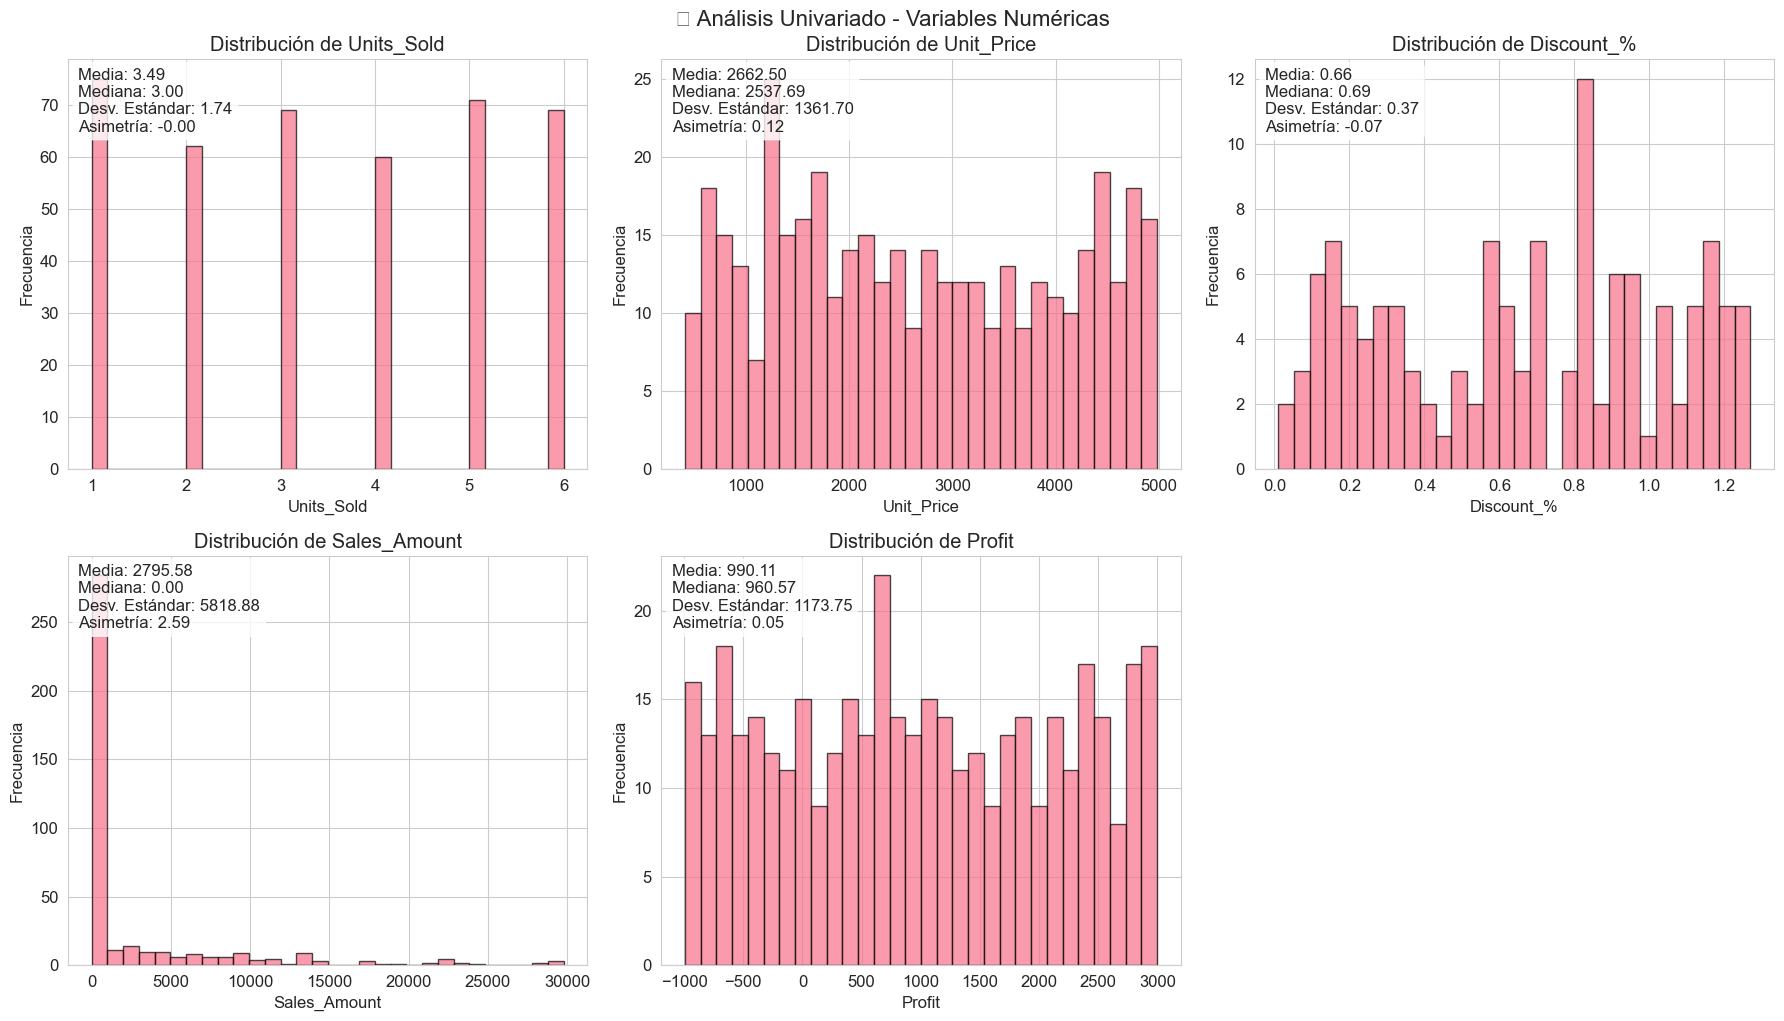


📋 ANÁLISIS DE VARIABLES CATEGÓRICAS

🏷️ PRODUCT_CATEGORY:
Valores únicos: 6
Top 10:
Product_Category
Accessories    77
Dresses        74
Shoes          70
T-Shirts       65
Jeans          61
Jackets        59
Name: count, dtype: int64


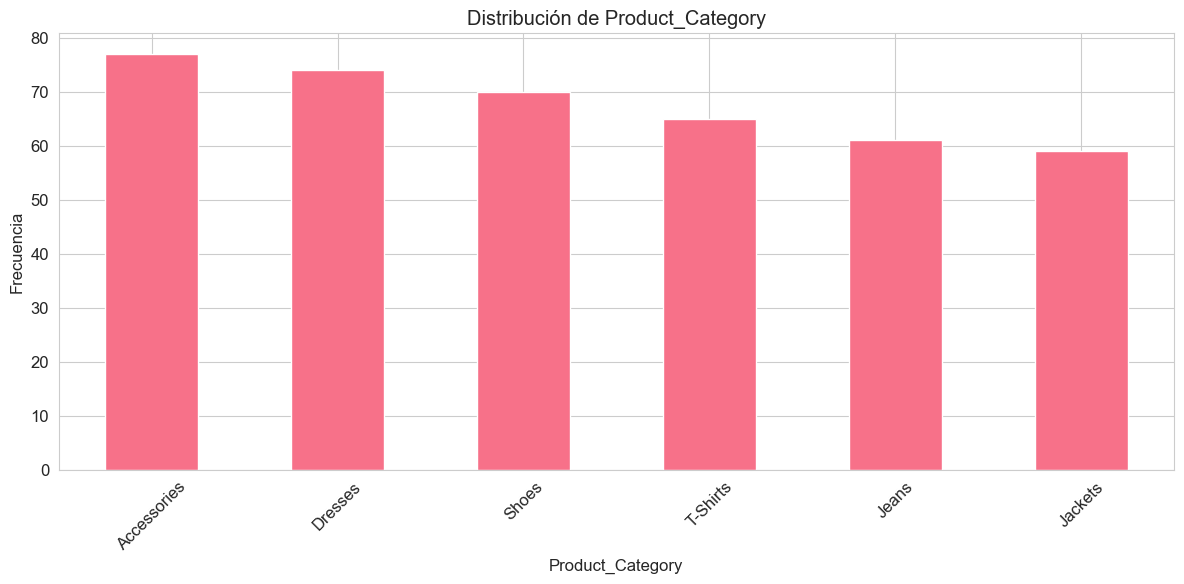


🏷️ CITY:
Valores únicos: 8
Top 10:
City
Ahmedabad    69
Mumbai       68
Delhi        64
Pune         61
Hyderabad    53
Bengaluru    36
Bangalore    31
hyderbad     24
Name: count, dtype: int64


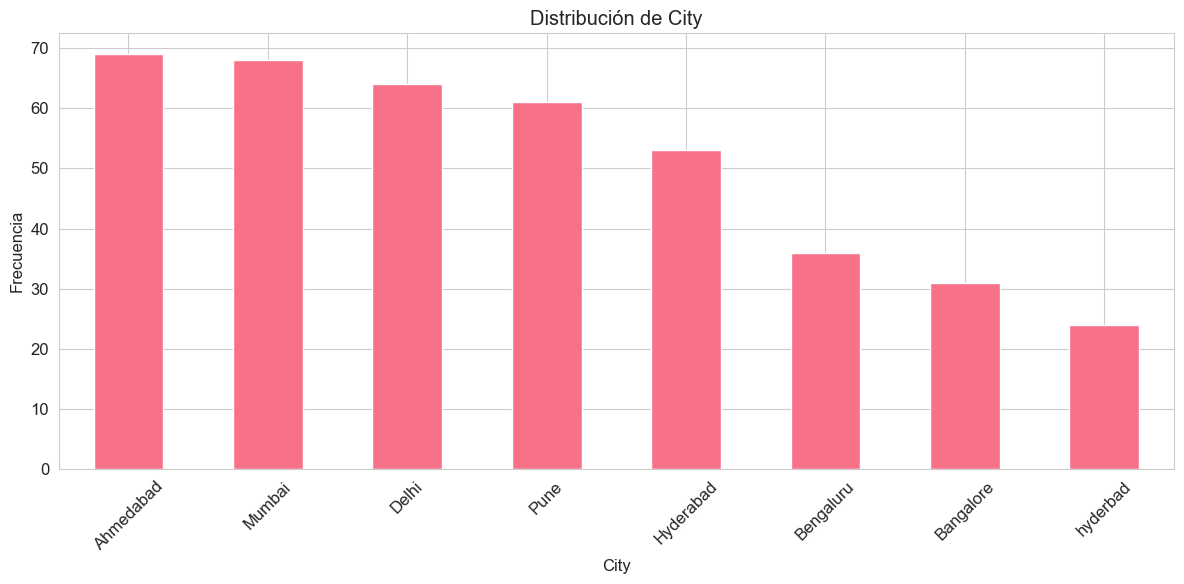


🏷️ SEGMENT:
Valores únicos: 2
Top 10:
Segment
B2C    147
B2B    135
Name: count, dtype: int64


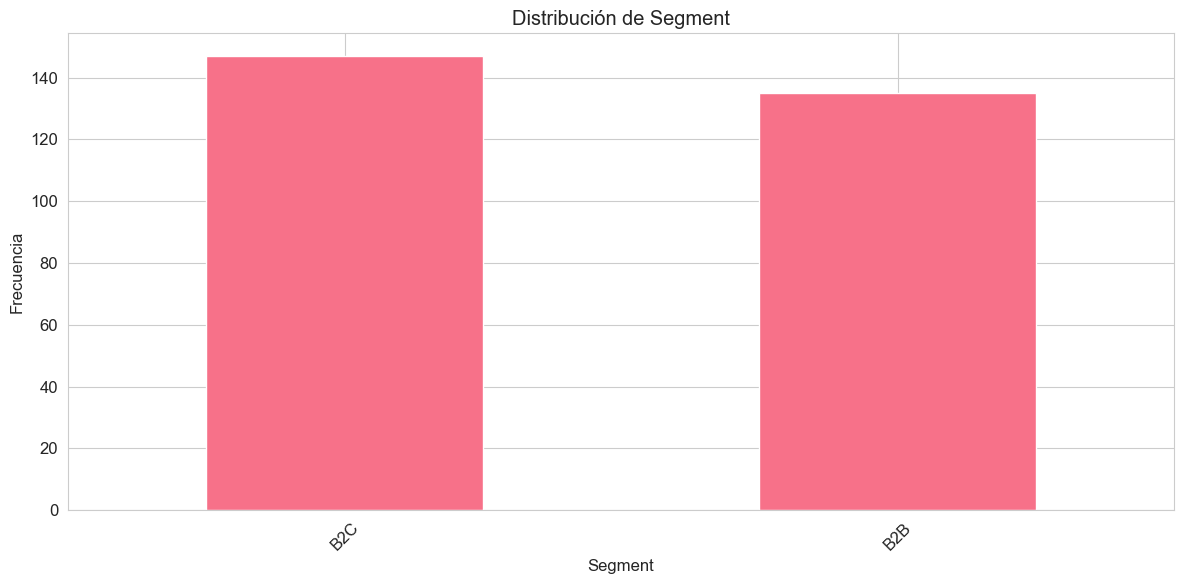

In [5]:
print("\n📊 ANÁLISIS UNIVARIADO")
print("=" * 30)

# Crear figura con subplots
fig, axes = plt.subplots(3, 3, figsize=(18, 15))
fig.suptitle('📈 Análisis Univariado - Variables Numéricas', fontsize=16, y=0.98)

# Variables numéricas para analizar
numeric_vars = ['Units_Sold', 'Unit_Price', 'Discount_%', 'Sales_Amount', 'Profit']

# Análisis de cada variable numérica
for i, var in enumerate(numeric_vars):
    row = i // 3
    col = i % 3
    
    # Histograma
    axes[row, col].hist(df_clean[var], bins=30, alpha=0.7, edgecolor='black')
    axes[row, col].set_title(f'Distribución de {var}')
    axes[row, col].set_xlabel(var)
    axes[row, col].set_ylabel('Frecuencia')
    
    # Estadísticas descriptivas
    stats_text = f"""Media: {df_clean[var].mean():.2f}
Mediana: {df_clean[var].median():.2f}
Desv. Estándar: {df_clean[var].std():.2f}
Asimetría: {df_clean[var].skew():.2f}"""
    
    axes[row, col].text(0.02, 0.98, stats_text, transform=axes[row, col].transAxes,
                       verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

# Eliminar subplots vacíos
for i in range(len(numeric_vars), 9):
    row = i // 3
    col = i % 3
    fig.delaxes(axes[row, col])

plt.tight_layout()
plt.show()

# Análisis de variables categóricas
print("\n📋 ANÁLISIS DE VARIABLES CATEGÓRICAS")
print("=" * 40)

categorical_vars = ['Product_Category', 'City', 'Segment', 'Customer_Name']

for var in categorical_vars[:3]:  # Excluimos Customer_Name por ser muy específico
    print(f"\n🏷️ {var.upper()}:")
    value_counts = df_clean[var].value_counts()
    print(f"Valores únicos: {len(value_counts)}")
    print("Top 10:")
    print(value_counts.head(10))
    
    # Crear gráfico de barras
    plt.figure(figsize=(12, 6))
    if len(value_counts) <= 15:
        value_counts.plot(kind='bar')
        plt.title(f'Distribución de {var}')
        plt.xticks(rotation=45)
        plt.ylabel('Frecuencia')
        plt.tight_layout()
        plt.show()

## 6. ANÁLISIS BIVARIADO


🔗 ANÁLISIS BIVARIADO
📈 MATRIZ DE CORRELACIÓN:
              Units_Sold  Unit_Price  Discount_%  Sales_Amount  Profit
Units_Sold         1.000       0.022       0.011         0.208   0.000
Unit_Price         0.022       1.000      -0.030         0.297  -0.030
Discount_%         0.011      -0.030       1.000        -0.039   0.084
Sales_Amount       0.208       0.297      -0.039         1.000   0.024
Profit             0.000      -0.030       0.084         0.024   1.000


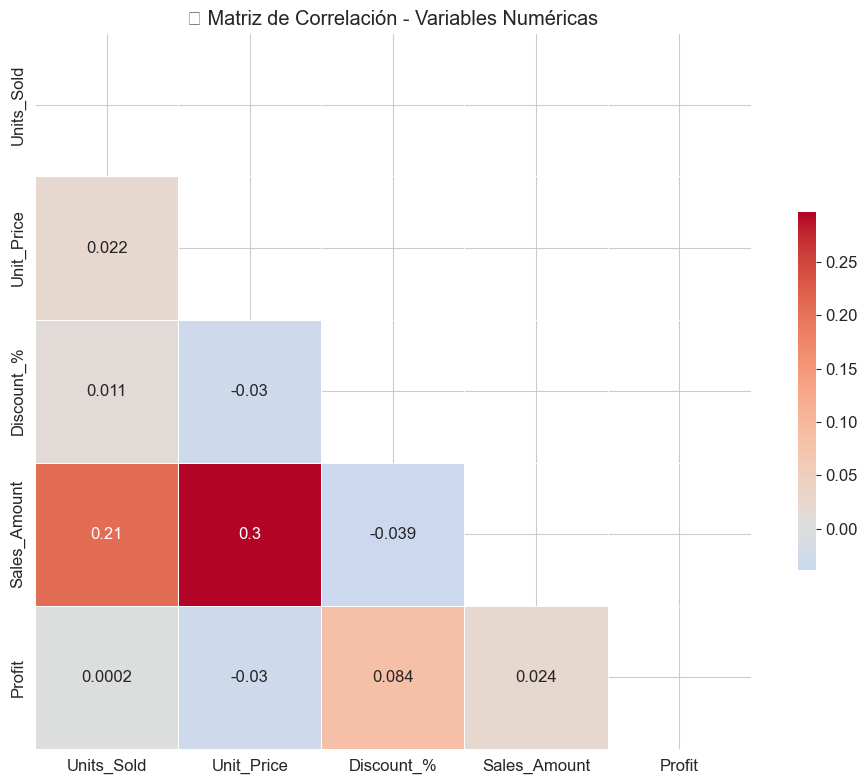


💰 VENTAS POR CATEGORÍA DE PRODUCTO:
                  Ventas_Total  Ventas_Promedio  Num_Transacciones  \
Product_Category                                                     
Jackets              262571.32          4450.36                 59   
Dresses              221126.81          2988.20                 74   
Accessories          200560.31          2604.68                 77   
Jeans                161360.15          2645.25                 61   
Shoes                152753.09          2182.19                 70   
T-Shirts             136632.02          2102.03                 65   

                  Profit_Total  Profit_Promedio  Unidades_Total  
Product_Category                                                 
Jackets               49688.30           842.17           212.0  
Dresses               84480.52          1141.63           247.0  
Accessories           77936.71          1012.17           260.0  
Jeans                 63302.92          1037.75           224.0  
Shoes 

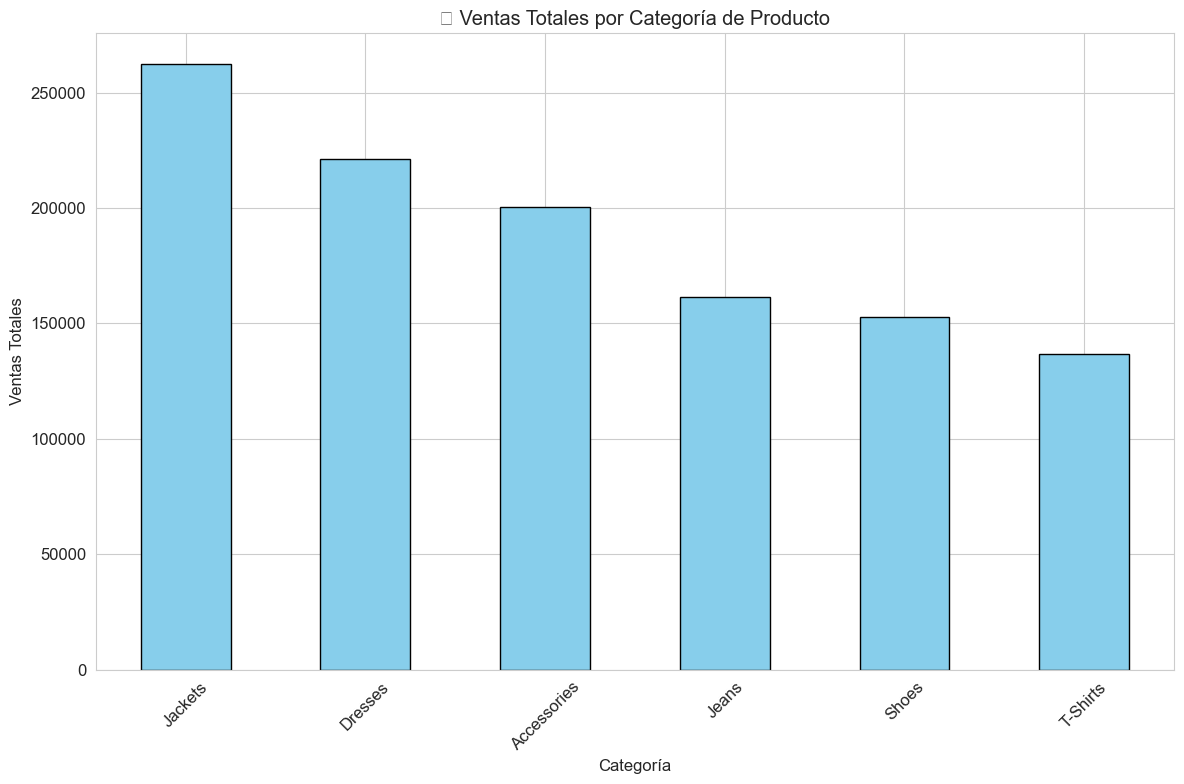


📅 ANÁLISIS TEMPORAL (Fechas válidas: 310)
Ventas mensuales (muestra):
            Sales_Amount  Order_ID
Year Month                        
2023 7          12061.24         5
     8          29770.24         4
     9          11323.17         5
     10             0.00         3
     11             0.00         3
     12         28125.96         8
2024 1           4197.54         5
     2              0.00         4
     3          14336.37         7
     4           3336.88         6


In [6]:
print("\n🔗 ANÁLISIS BIVARIADO")
print("=" * 25)

# Matriz de correlación
print("📈 MATRIZ DE CORRELACIÓN:")
correlation_matrix = df_clean[numeric_vars].corr()
print(correlation_matrix.round(3))

# Visualizar matriz de correlación
plt.figure(figsize=(10, 8))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": .5}, mask=mask)
plt.title('🔥 Matriz de Correlación - Variables Numéricas')
plt.tight_layout()
plt.show()

# Análisis de ventas por categoría
print("\n💰 VENTAS POR CATEGORÍA DE PRODUCTO:")
sales_by_category = df_clean.groupby('Product_Category').agg({
    'Sales_Amount': ['sum', 'mean', 'count'],
    'Profit': ['sum', 'mean'],
    'Units_Sold': 'sum'
}).round(2)

sales_by_category.columns = ['Ventas_Total', 'Ventas_Promedio', 'Num_Transacciones', 
                           'Profit_Total', 'Profit_Promedio', 'Unidades_Total']
sales_by_category = sales_by_category.sort_values('Ventas_Total', ascending=False)
print(sales_by_category)

# Gráfico de ventas por categoría
plt.figure(figsize=(12, 8))
sales_by_category['Ventas_Total'].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('💵 Ventas Totales por Categoría de Producto')
plt.xlabel('Categoría')
plt.ylabel('Ventas Totales')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Análisis temporal (si tenemos fechas válidas)
valid_dates = df_clean['Order_Date'].notna().sum()
print(f"\n📅 ANÁLISIS TEMPORAL (Fechas válidas: {valid_dates})")

if valid_dates > 100:  # Solo si tenemos suficientes fechas válidas
    df_temporal = df_clean[df_clean['Order_Date'].notna()].copy()
    df_temporal['Year'] = df_temporal['Order_Date'].dt.year
    df_temporal['Month'] = df_temporal['Order_Date'].dt.month
    df_temporal['Quarter'] = df_temporal['Order_Date'].dt.quarter
    
    # Ventas por año/mes
    temporal_analysis = df_temporal.groupby(['Year', 'Month']).agg({
        'Sales_Amount': 'sum',
        'Order_ID': 'count'
    }).round(2)
    
    print("Ventas mensuales (muestra):")
    print(temporal_analysis.head(10))

## 7. DETECCIÓN DE OUTLIERS


🎯 DETECCIÓN DE OUTLIERS

🔍 SALES_AMOUNT:
  Outliers detectados: 65 (16.01%)
  Rango normal: -4079.96 - 6799.93

🔍 UNIT_PRICE:
  Outliers detectados: 0 (0.00%)
  Rango normal: -2195.37 - 7541.51

🔍 PROFIT:
  Outliers detectados: 0 (0.00%)
  Rango normal: -3110.24 - 5127.53

🔍 UNITS_SOLD:
  Outliers detectados: 0 (0.00%)
  Rango normal: -2.50 - 9.50


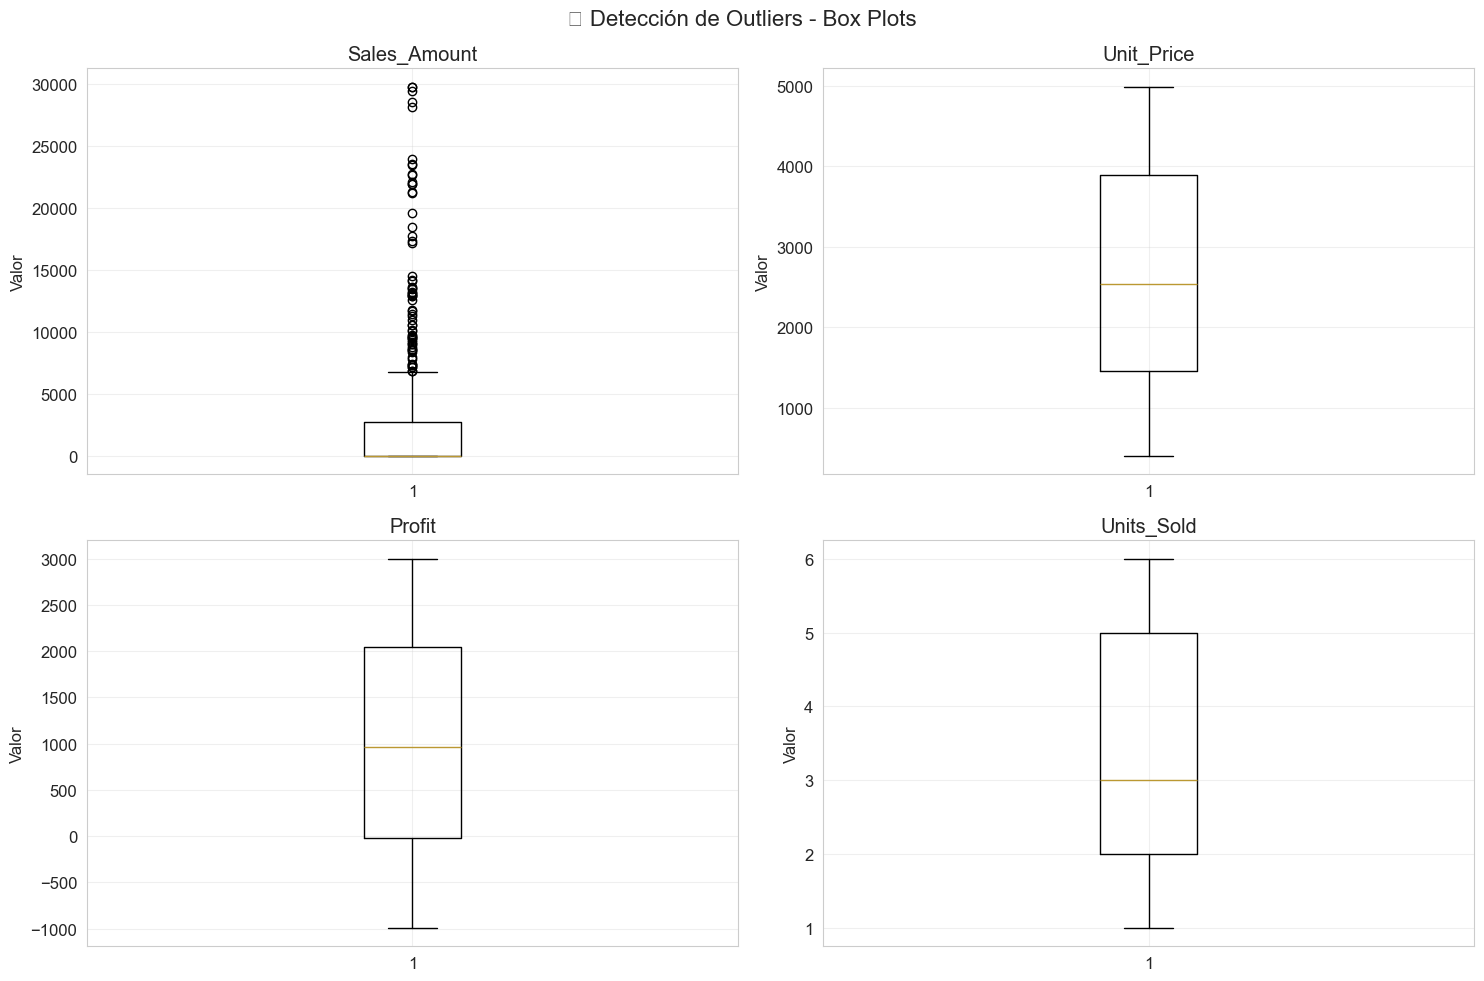

In [7]:
print("\n🎯 DETECCIÓN DE OUTLIERS")
print("=" * 30)

# Función para detectar outliers usando IQR
def detect_outliers_iqr(data, column):
    """Detecta outliers usando el método IQR"""
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Análisis de outliers para variables principales
outlier_summary = {}

for var in ['Sales_Amount', 'Unit_Price', 'Profit', 'Units_Sold']:
    outliers, lower, upper = detect_outliers_iqr(df_clean, var)
    outlier_percentage = (len(outliers) / len(df_clean)) * 100
    
    outlier_summary[var] = {
        'count': len(outliers),
        'percentage': outlier_percentage,
        'lower_bound': lower,
        'upper_bound': upper
    }
    
    print(f"\n🔍 {var.upper()}:")
    print(f"  Outliers detectados: {len(outliers)} ({outlier_percentage:.2f}%)")
    print(f"  Rango normal: {lower:.2f} - {upper:.2f}")

# Visualización de outliers con boxplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('📦 Detección de Outliers - Box Plots', fontsize=16)

variables = ['Sales_Amount', 'Unit_Price', 'Profit', 'Units_Sold']
positions = [(0,0), (0,1), (1,0), (1,1)]

for var, pos in zip(variables, positions):
    axes[pos].boxplot(df_clean[var], vert=True)
    axes[pos].set_title(f'{var}')
    axes[pos].set_ylabel('Valor')
    axes[pos].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 8. INSIGHTS Y RECOMENDACIONES

In [8]:
print("\n🎯 INSIGHTS CLAVE Y RECOMENDACIONES")
print("=" * 45)

# Calcular métricas clave del negocio
total_revenue = df_clean['Sales_Amount'].sum()
total_profit = df_clean['Profit'].sum()
profit_margin = (total_profit / total_revenue) * 100
avg_order_value = df_clean['Sales_Amount'].mean()
total_units = df_clean['Units_Sold'].sum()
unique_customers = df_clean['Customer_Name'].nunique()

print(f"""
💰 MÉTRICAS CLAVE DEL NEGOCIO:
═══════════════════════════════
• Ingresos Totales: ${total_revenue:,.2f}
• Profit Total: ${total_profit:,.2f}
• Margen de Profit: {profit_margin:.2f}%
• Valor Promedio por Pedido: ${avg_order_value:.2f}
• Unidades Vendidas: {total_units:,}
• Clientes Únicos: {unique_customers:,}
""")

# Top productos/categorías
top_categories = df_clean.groupby('Product_Category')['Sales_Amount'].sum().sort_values(ascending=False).head(5)
top_cities = df_clean.groupby('City')['Sales_Amount'].sum().sort_values(ascending=False).head(5)

print("🏆 TOP 5 CATEGORÍAS POR VENTAS:")
for cat, sales in top_categories.items():
    percentage = (sales / total_revenue) * 100
    print(f"  • {cat}: ${sales:,.2f} ({percentage:.1f}%)")

print(f"\n🌆 TOP 5 CIUDADES POR VENTAS:")
for city, sales in top_cities.items():
    percentage = (sales / total_revenue) * 100
    print(f"  • {city}: ${sales:,.2f} ({percentage:.1f}%)")

# Análisis de descuentos
avg_discount = df_clean['Discount_%'].mean()
high_discount_sales = df_clean[df_clean['Discount_%'] > avg_discount]['Sales_Amount'].sum()
high_discount_percentage = (high_discount_sales / total_revenue) * 100

print(f"""
💸 ANÁLISIS DE DESCUENTOS:
═════════════════════════
• Descuento Promedio: {avg_discount:.1f}%
• Ventas con Alto Descuento: ${high_discount_sales:,.2f} ({high_discount_percentage:.1f}%)
""")

print("""
🔍 RECOMENDACIONES BASADAS EN EL ANÁLISIS:
═══════════════════════════════════════════

1. 📈 ESTRATEGIA DE PRODUCTOS:
   • Enfocarse en las categorías top performers
   • Revisar estrategia para categorías de bajo rendimiento
   • Optimizar inventario basado en demanda histórica

2. 🌍 EXPANSIÓN GEOGRÁFICA:
   • Fortalecer presencia en ciudades top performers
   • Investigar oportunidades en mercados sub-representados
   • Adaptar estrategias de marketing por región

3. 💰 OPTIMIZACIÓN DE PRECIOS:
   • Revisar estrategia de descuentos (algunos muy altos)
   • Analizar elasticidad precio-demanda por categoría
   • Implementar pricing dinámico

4. 📊 CALIDAD DE DATOS:
   • Implementar validaciones automáticas en el sistema
   • Estandarizar formatos de entrada de datos
   • Crear alertas para valores atípicos

5. 👥 SEGMENTACIÓN DE CLIENTES:
   • Desarrollar perfiles de clientes por comportamiento
   • Implementar programas de fidelización
   • Personalizar ofertas por segmento

6. 📈 MONITOREO CONTINUO:
   • Implementar dashboards en tiempo real
   • Establecer KPIs y alertas automáticas
   • Realizar análisis de cohorte para retención
""")

print("\n" + "="*60)
print("✅ ANÁLISIS EXPLORATORIO DE DATOS COMPLETADO")
print("="*60)


🎯 INSIGHTS CLAVE Y RECOMENDACIONES

💰 MÉTRICAS CLAVE DEL NEGOCIO:
═══════════════════════════════
• Ingresos Totales: $1,135,003.70
• Profit Total: $401,983.77
• Margen de Profit: 35.42%
• Valor Promedio por Pedido: $2795.58
• Unidades Vendidas: 1,415.0
• Clientes Únicos: 405

🏆 TOP 5 CATEGORÍAS POR VENTAS:
  • Jackets: $262,571.32 (23.1%)
  • Dresses: $221,126.81 (19.5%)
  • Accessories: $200,560.31 (17.7%)
  • Jeans: $161,360.15 (14.2%)
  • Shoes: $152,753.09 (13.5%)

🌆 TOP 5 CIUDADES POR VENTAS:
  • Bangalore: $192,713.74 (17.0%)
  • Pune: $191,377.77 (16.9%)
  • Delhi: $176,556.29 (15.6%)
  • Ahmedabad: $168,154.88 (14.8%)
  • Hyderabad: $160,190.81 (14.1%)

💸 ANÁLISIS DE DESCUENTOS:
═════════════════════════
• Descuento Promedio: 0.7%
• Ventas con Alto Descuento: $587,641.73 (51.8%)


🔍 RECOMENDACIONES BASADAS EN EL ANÁLISIS:
═══════════════════════════════════════════

1. 📈 ESTRATEGIA DE PRODUCTOS:
   • Enfocarse en las categorías top performers
   • Revisar estrategia para cate